<h1 style="text-align: center">Customer Segmentation</h1>

<h3 style="text-align: left">Customer Segmentation enables orgaizations to:</h3>
<ul> 
    <li>Better understand their customers</li>
    <li>Tailor their product offerings</li>
    <li>Optimize marketing and growth strategies</li>
</ul>

Dataset can be found in the UCI Machine Learning repository <a href="https://archive.ics.uci.edu/ml/datasets/online+retail">here</a>

---
<h3 style="text-align: left">Dataset description</h3>
The tabluar dataset consists details of purchases made by the customers on an online retail platform.

Dataset features:
<ul>
    <li>InvoiceNo: The invoice number of each purchase made on the platform</li>
    <li>StockCode: The SKU of each product on the platform</li>
    <li>Description: The small description of the product</li>
    <li>Quantity: Quantity purchased by the customer</li>
    <li>InvoiceDate: The date of purchase</li>
    <li>UnitPrice: Price of each unit of that product</li>
    <li>CustomerID: The unique ID assigned to each customer</li>
    <li>Country: The location of each customer</li>
</ul>

---
<h3 style="text-align: left">Index</h3>
<ol>
    <li>Importing libraries and dataset</li>
    <li>Exploratory Data Analysis and Data Cleaning</li>
    <li>Preparing data for analysis</li>
    <li>Customer segmentation using RFM technique</li>
    <li>Data visualization</li>
    <li>Insignts</li>
</ol>

---
### 1. Importing libraries and dataset

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import warnings
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
# settings for displaying complete results
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
np.set_printoptions(threshold=np.inf)
warnings.filterwarnings('ignore')

In [3]:
# creating the dataframe with the online_retail.xlsx file
df = pd.read_excel("online_retail.xlsx")

In [4]:
# displaying the header and top 5 rows of the dataframe
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


---
### 2. Exploratory Data Analysis

Performing exploratory data analysis on the dataset and trying to find some insights

In [5]:
# finding the unique countries in the dataset
df.Country.unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [6]:
# finding number of customers from each country
country_customers = df[['Country', 'CustomerID']].drop_duplicates()
country_customers.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID', ascending = False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


The result shows that most of the customers are from UK. Therefore, we can limit our analysis to UK.

In [7]:
# creating a new dataframe which will contain details related to UK only
df_uk = df.loc[df['Country'] == 'United Kingdom']

In [8]:
# checking for NULL values in the UK dataframe
df_uk.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

The above result shows that there are 1454 null values in description and 133600 null values in CustomerID. However, we do not require these columns for our analysis. Therefore, we can wither drop these columns or ignore them.

In [9]:
# proceeding with dropping the columns that has null value
columns_to_remove = ['Description']
df_uk = df_uk.drop(columns = columns_to_remove)

In [10]:
# displaying the top 5 columns in the new UK dataframe
df_uk.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
# checking if the Quantity column in the UK dataframe has negative values
has_negative = (df_uk['Quantity'] < 0).sum()

# printing the total negative values in the column
print("Total negative values in Quantity column:", has_negative)

Total negative values in Quantity column: 9192


In [12]:
# removing the rows that have Quantity < 0
df_uk = df_uk[(df_uk['Quantity'] >= 0)]

In [13]:
# displaying the top 5 rows of the new df_uk dataframe
df_uk.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [14]:
# creating a new column for 'TotalPrice' by multiplying 'Quantity' with 'UnitPrice' for each row
df_uk['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [15]:
# viewing the new TotalPrice column
df_uk.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [16]:
# finding the earliest invoice date
df_uk['InvoiceDate'].min()

Timestamp('2010-12-01 08:26:00')

In [17]:
# finding the latest invoice date
df_uk['InvoiceDate'].max()

Timestamp('2011-12-09 12:49:00')

In [18]:
# calculating the recency
most_recent = dt.datetime(2011,12,10)
df_uk['InvoiceDate'] = pd.to_datetime(df_uk['InvoiceDate'])

---
### 3. Data Preparation

We will use the RFM customer segmentation technique for finding out the best customers. 

The R, F and M in RFM stands for Recency, Frequency and Monetary.
<ul>
    <li><strong>R</strong>ecency: Number of days since last purchase.</li>
    <li><strong>F</strong>requency: The total number of purchases.</li>
    <li><strong>M</strong>onetary: The total amount of money spent.</li>
</ul>

<h4>Creating a RFM table for analysis and segmenting customers.</h4>

In [19]:
# creating the RFM table
table = df_uk.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (most_recent - x.max()).days,
    'InvoiceNo': lambda x: len(x),
    'TotalPrice': lambda x: x.sum()
})

# type-casting the InvoiceDate column to integer
table['InvoiceDate'] = table['InvoiceDate'].astype(int)

# renaming the columns for better understanding
table.rename(columns = {
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary_value'
}, inplace = True)

In [20]:
# displaying the RFM table
table.head(10)

,Recency,Frequency,Monetary_value
CustomerID,,,
12346.0,325,1,77183.60
12747.0,2,103,4196.01
12748.0,0,4596,33719.73
12749.0,3,199,4090.88
12820.0,3,59,942.34
12821.0,214,6,92.72
12822.0,70,46,948.88
12823.0,74,5,1759.50
12824.0,59,25,397.12


### 4. Customer Segmentation using RFM technique

In [21]:
# creating segments using quartiles
segments = table.quantile(q = [0.25, 0.5, 0.75])
segments = segments.to_dict()

In [22]:
# creating a RFM table for customers
customer_table = table

In [23]:
# assigning a quartile to Recency values for splitting into segments (1 - good to 4 bad)
def R_value_score(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.5]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

In [24]:
# assigning a quartile to Recency, Frequency and Monetary values for splitting into segments (1 - bad to 4 good)
def FM_value_score(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.5]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1

In [25]:
# assigning the segment numbers to Recency
customer_table['R_quartile'] = customer_table['Recency'].apply(R_value_score, args = ('Recency', segments,))

# assigning the segment numbers to Frequency
customer_table['F_quartile'] = customer_table['Frequency'].apply(FM_value_score, args = ('Frequency', segments,))

# assigning the segment numbers to Monetary value
customer_table['M_quartile'] = customer_table['Monetary_value'].apply(FM_value_score, args = ('Monetary_value', segments,))

In [26]:
# displaying the Recency, Frequency and Monetary quartiles for each customer
customer_table.head(10)

,Recency,Frequency,Monetary_value,R_quartile,F_quartile,M_quartile
CustomerID,,,,,,
12346.0,325,1,77183.60,4,4,1
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2
12821.0,214,6,92.72,4,4,4
12822.0,70,46,948.88,3,2,2
12823.0,74,5,1759.50,3,4,1
12824.0,59,25,397.12,3,3,3


In [27]:
# assigning a score by combining the values of R_quartile, F_quartile, M_quartile
customer_table['RFM_score'] = customer_table.R_quartile.map(str) + customer_table.F_quartile.map(str) + customer_table.M_quartile.map(str)

In [28]:
# displaying the RFM Scores for each customer
customer_table.head(10)

,Recency,Frequency,Monetary_value,R_quartile,F_quartile,M_quartile,RFM_score
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,2,103,4196.01,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
12749.0,3,199,4090.88,1,1,1,111
12820.0,3,59,942.34,1,2,2,122
12821.0,214,6,92.72,4,4,4,444
12822.0,70,46,948.88,3,2,2,322
12823.0,74,5,1759.50,3,4,1,341
12824.0,59,25,397.12,3,3,3,333


In [29]:
# displaying the top 25 customers (RFM_score=111)
customer_table[customer_table['RFM_score'] == '111'].sort_values('Monetary_value', ascending=False).head(25)

,Recency,Frequency,Monetary_value,R_quartile,F_quartile,M_quartile,RFM_score
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
17511.0,2,963,91062.38,1,1,1,111
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111
15311.0,0,2379,60767.90,1,1,1,111
13089.0,2,1818,58825.83,1,1,1,111
15769.0,7,130,56252.72,1,1,1,111


In [30]:
# displaying the top 25 customers by recency
customer_table.sort_values('Recency', ascending=False).head(25)

,Recency,Frequency,Monetary_value,R_quartile,F_quartile,M_quartile,RFM_score
CustomerID,,,,,,,
17643.0,373,8,101.55,4,4,4,444
15165.0,373,27,487.75,4,3,3,433
13747.0,373,1,79.60,4,4,4,444
17908.0,373,58,243.28,4,2,4,424
17968.0,373,85,277.35,4,2,4,424
16048.0,373,8,256.44,4,4,4,444
15922.0,373,11,369.50,4,4,3,443
16583.0,373,14,233.45,4,4,4,444
18011.0,373,28,102.79,4,3,4,434


In [31]:
# displaying the top 25 customers by frequency
customer_table.sort_values('Frequency', ascending=False).head(25)

,Recency,Frequency,Monetary_value,R_quartile,F_quartile,M_quartile,RFM_score
CustomerID,,,,,,,
17841.0,1,7847,40991.57,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
12748.0,0,4596,33719.73,1,1,1,111
14606.0,1,2700,12156.65,1,1,1,111
15311.0,0,2379,60767.90,1,1,1,111
13089.0,2,1818,58825.83,1,1,1,111
13263.0,1,1677,7454.07,1,1,1,111
14298.0,8,1637,51527.30,1,1,1,111
15039.0,9,1502,19914.44,1,1,1,111


In [32]:
# displaying the top 25 customers by monetary value
customer_table.sort_values('Monetary_value', ascending=False).head(25)

,Recency,Frequency,Monetary_value,R_quartile,F_quartile,M_quartile,RFM_score
CustomerID,,,,,,,
18102.0,0,431,259657.30,1,1,1,111
17450.0,8,337,194550.79,1,1,1,111
16446.0,0,3,168472.50,1,4,1,141
17511.0,2,963,91062.38,1,1,1,111
16029.0,38,242,81024.84,2,1,1,211
12346.0,325,1,77183.60,4,4,1,441
16684.0,4,277,66653.56,1,1,1,111
14096.0,4,5111,65164.79,1,1,1,111
13694.0,3,568,65039.62,1,1,1,111


In [33]:
# counting unique RFM scores in the customer table
unique_rfm = customer_table['RFM_score'].nunique()
print(f"Unique RFM scores in the customer table:", unique_rfm)

Unique RFM scores in the customer table: 61


In [34]:
# count of each unique RFM score in the customer table
rfm_count = customer_table['RFM_score'].value_counts()
print(f'score count')
print(rfm_count)

score count
111    409
444    343
211    186
433    180
344    168
222    156
322    142
333    141
122    124
244    112
233    107
443    104
311     92
434     90
212     83
112     81
343     79
121     78
332     77
133     66
223     63
144     59
422     58
221     53
234     52
321     51
232     49
423     49
323     48
334     42
132     40
123     39
312     39
432     35
424     34
243     33
342     27
224     25
442     23
134     21
143     21
324     21
411     20
412     19
213     18
131     18
331     16
113     16
242     14
341     14
142     13
124     13
313     12
231     11
441      8
421      8
241      7
141      5
431      4
413      4
114      1
Name: RFM_score, dtype: int64


---
### 5. Data visualization

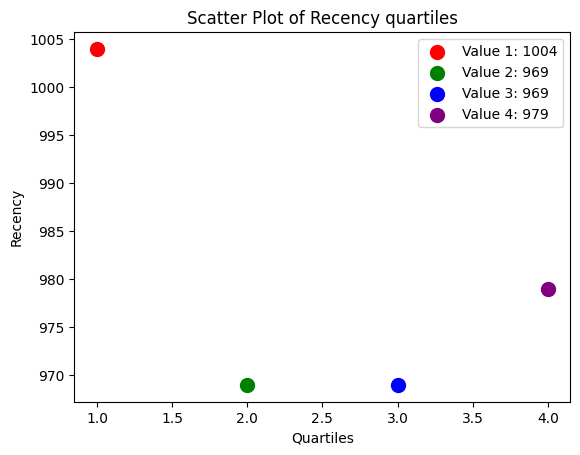

In [35]:
# plotting a scatterplot for the Recency quartile

# counting the total number of Recency in each Recency quartile 
value_counts = customer_table['R_quartile'].value_counts().sort_index()

# generate colors for each value
colors = ['red', 'green', 'blue', 'purple']

# plotting X and Y labels
plt.xlabel('Quartiles')
plt.ylabel('Recency')
plt.title('Scatter Plot of Recency quartiles')

# create scatter plots for each value
for i, (value, count) in enumerate(value_counts.items()):
    plt.scatter(value, count, c = colors[i], s = 100, label = f'Value {value}: {count}')

# show legend
plt.legend()

# show the plot
plt.show()

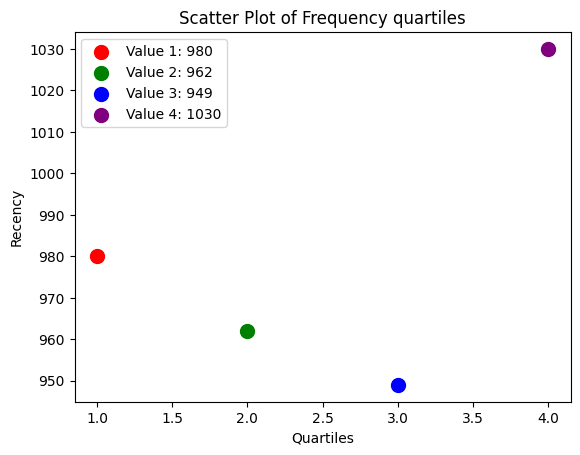

In [36]:
# plotting a scatterplot for the Frequency quartile
value_counts = customer_table['F_quartile'].value_counts().sort_index()

# generate colors for each value
colors = ['red', 'green', 'blue', 'purple']

# plotting X and Y labels
plt.xlabel('Quartiles')
plt.ylabel('Recency')
plt.title('Scatter Plot of Frequency quartiles')

# create scatter plots for each value
for i, (value, count) in enumerate(value_counts.items()):
    plt.scatter(value, count, c = colors[i], s = 100, label = f'Value {value}: {count}')

# show legend
plt.legend()

# show the plot
plt.show()

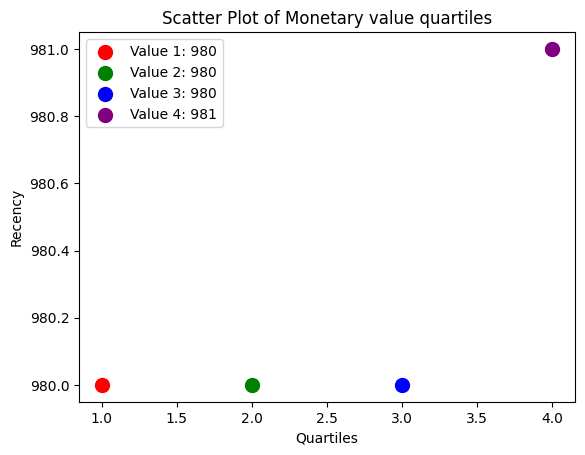

In [37]:
# plotting a scatterplot for the Monetary_value quartile
value_counts = customer_table['M_quartile'].value_counts().sort_index()

# generate colors for each value
colors = ['red', 'green', 'blue', 'purple']

# plotting X and Y labels
plt.xlabel('Quartiles')
plt.ylabel('Recency')
plt.title('Scatter Plot of Monetary value quartiles')

# create scatter plots for each value
for i, (value, count) in enumerate(value_counts.items()):
    plt.scatter(value, count, c = colors[i], s = 100, label = f'Value {value}: {count}')

# show legend
plt.legend()

# show the plot
plt.show()

---
### Insights

<ol>
    <li>The highest number of customers are from UK.</li>
    <li>The highest value of Recency is 373 days.</li>
    <li>The highest value of Frequency is 7847.</li>
    <li>The highest value of Monetary value is 259657.30</li>
    <li>Total unique RFM scores are 61.</li>
    <li>The top 10 RFM scores and their counts are</li>
    <table align='left'>
      <tr>
        <th>RFM Score</th>
        <th>Count</th>
      </tr>
      <tr>
        <td>111</td>
        <td>409</td>
      </tr>
      <tr>
        <td>444</td>
        <td>343</td>
      </tr>
      <tr>
        <td>211</td>
        <td>186</td>
      </tr>
      <tr>
        <td>433</td>
        <td>180</td>
      </tr>
      <tr>
        <td>344</td>
        <td>168</td>
      </tr>
      <tr>
        <td>222</td>
        <td>156</td>
      </tr>
      <tr>
        <td>322</td>
        <td>142</td>
      </tr>
      <tr>
        <td>333</td>
        <td>141</td>
      </tr>
      <tr>
        <td>122</td>
        <td>124</td>
      </tr>
      <tr>
        <td>244</td>
        <td>112</td>
      </tr>
    </table>
</ol>